In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns

In [91]:
df = pd.read_csv("Fraudulent_E-Commerce_Transaction_Data.csv")
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [92]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [93]:
df.isnull()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1472948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1472949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1472950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
df = df.drop(['Transaction ID', 'Customer ID'], axis=1)

In [95]:
df.head()

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [96]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

df['Weekday'] = df['Transaction Date'].dt.weekday        # Day of the week as an integer (0=Monday, 6=Sunday)
df['Month'] = df['Transaction Date'].dt.month            # Month of the year as an integer (1=January, 12=December)
df['Hour'] = df['Transaction Date'].dt.hour

In [97]:
df = df.drop(['Transaction Date'], axis=1)

In [98]:
df['Is Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [99]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Weekday,Month,Hour,Is Address Match
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,1,2,5,1
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,6,2,8,1
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,0,3,3,1
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,5,3,20,1
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,0,1,5,1


In [100]:
df['Shipping Address Length'] = df['Shipping Address'].str.len()
df['Billing Address Length'] = df['Billing Address'].str.len()

df['Shipping City'] = df['Shipping Address'].str.extract(r'(\w+),')  # Extract city
df['Shipping State'] = df['Shipping Address'].str.extract(r', (\w+)')  # Extract state

In [101]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,...,Account Age Days,Transaction Hour,Weekday,Month,Hour,Is Address Match,Shipping Address Length,Billing Address Length,Shipping City,Shipping State
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,...,30,5,1,2,5,1,31,31,NaN,NaN
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",...,72,8,6,2,8,1,38,38,Cherylview,NV
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",...,63,3,0,3,3,1,46,46,Rothhaven,IL
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",...,124,20,5,3,20,1,45,45,Joshua,UT
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",...,158,5,0,1,5,1,53,53,Richardtown,OH


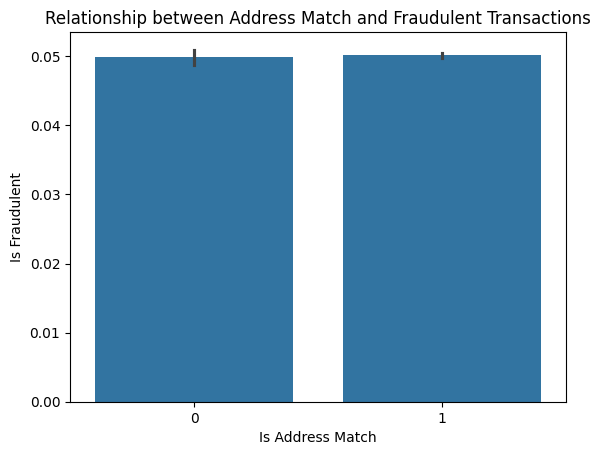

In [102]:
sns.barplot(x='Is Address Match', y='Is Fraudulent', data=df)
plt.title('Relationship between Address Match and Fraudulent Transactions')
plt.show()

In [103]:
#The column "Is Address Match" has no impact 

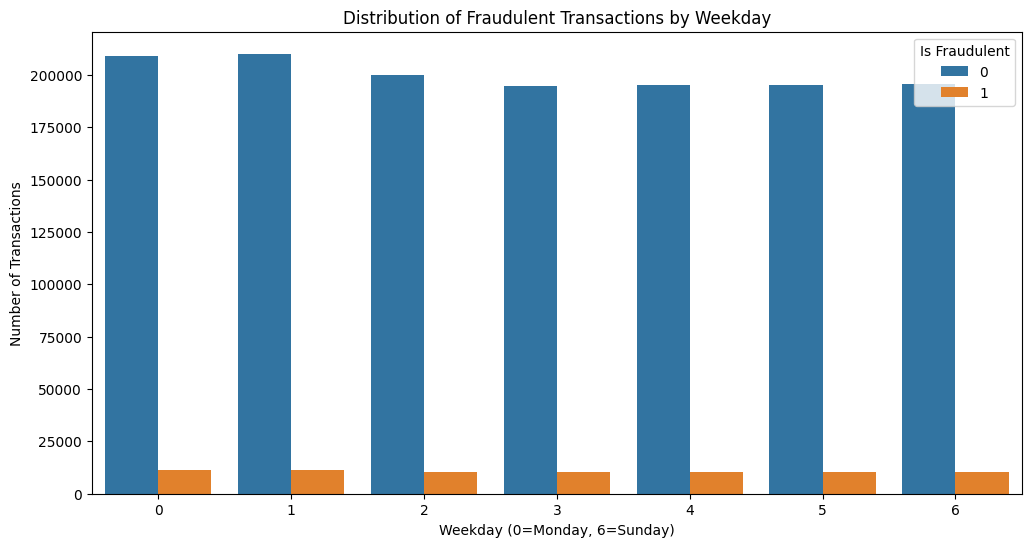

In [104]:
grouped_df = df.groupby(['Weekday', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraudulent', loc='upper right')
plt.show()


In [105]:
# Total number of rows in the dataset
total_count = df.shape[0]

# Number of rows with 'Is Fraudulent' = 1
fraud_count = df[df['Is Fraudulent'] == 1].shape[0]

print(f"Total number of transactions: {total_count}")
print(f"Number of fraudulent transactions: {fraud_count}")

Total number of transactions: 1472952
Number of fraudulent transactions: 73838


In [106]:
#The column "Weekday" has no impact 

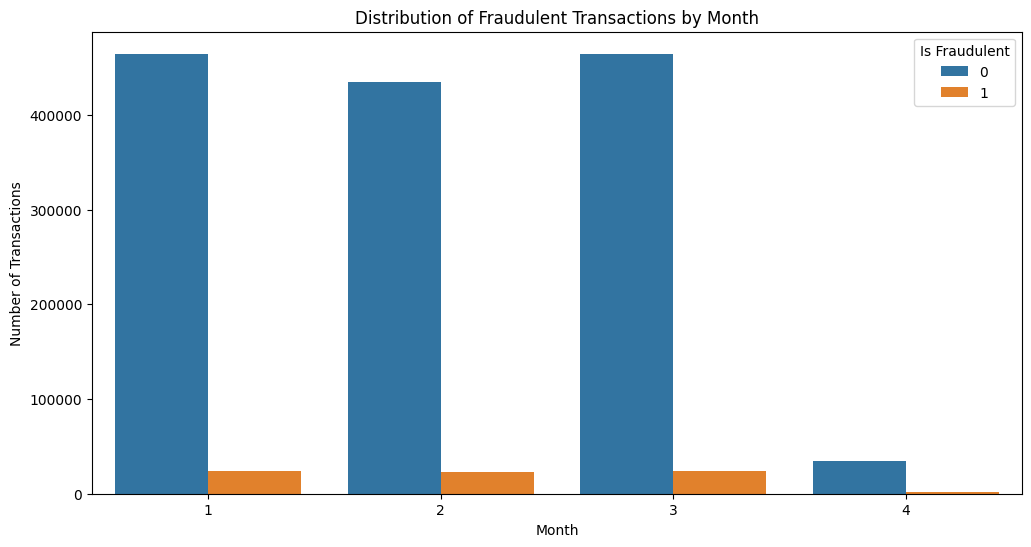

In [107]:
grouped_df = df.groupby(['Month', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraudulent', loc='upper right')
plt.show()


In [108]:
#The column "Month" has no impact 

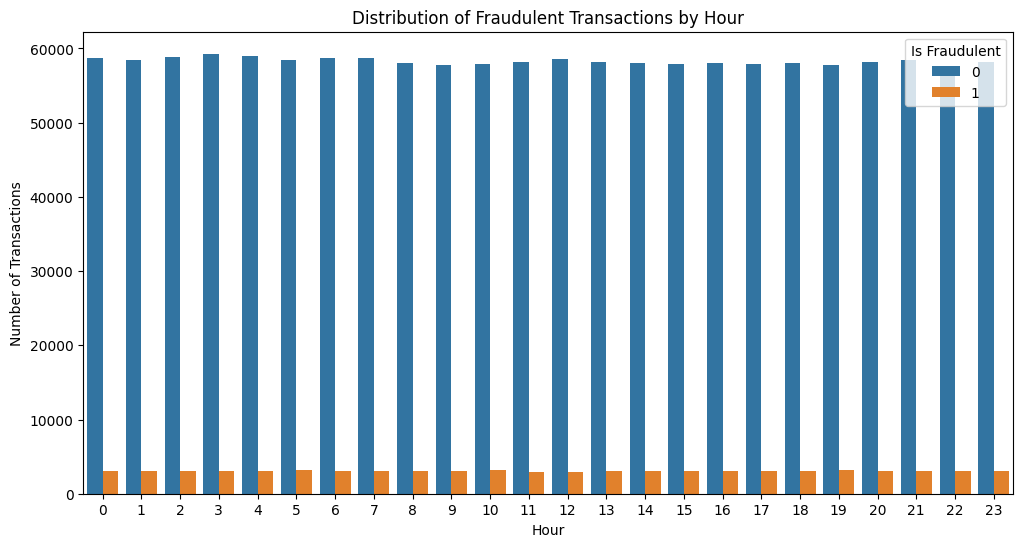

In [109]:
grouped_df = df.groupby(['Hour', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraudulent', loc='upper right')
plt.show()

In [110]:
#The column "Hour" has no impact 

In [111]:
df = df.drop(['Weekday','Hour','Month'], axis=1)

In [112]:
df = df.drop(['Is Address Match'], axis=1)

In [113]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Shipping Address Length,Billing Address Length,Shipping City,Shipping State
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,31,31,NaN,NaN
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,38,38,Cherylview,NV
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,46,46,Rothhaven,IL
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,45,45,Joshua,UT
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,53,53,Richardtown,OH


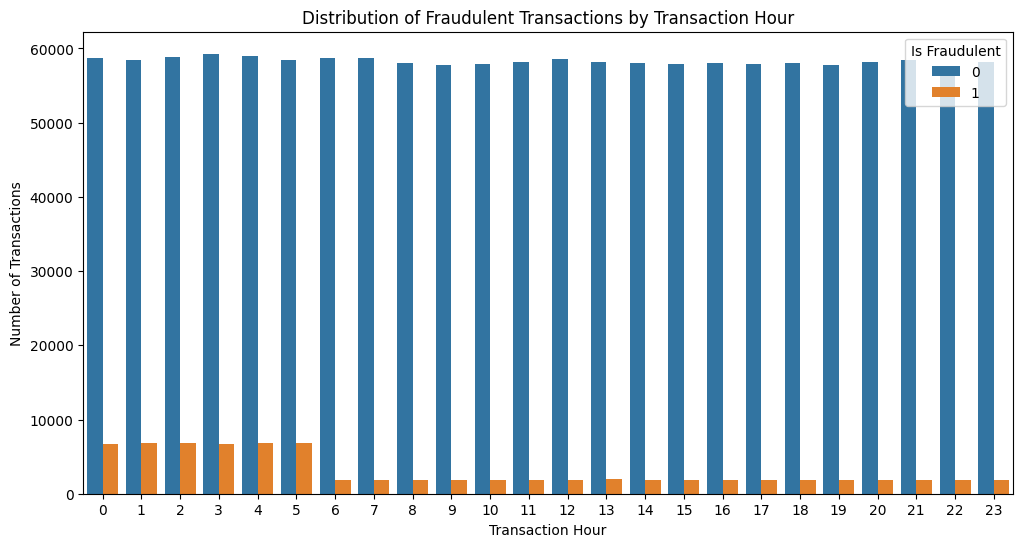

In [114]:
grouped_df = df.groupby(['Transaction Hour', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Transaction Hour', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraudulent', loc='upper right')
plt.show()

In [115]:
df = df.drop(['Shipping City'], axis=1)

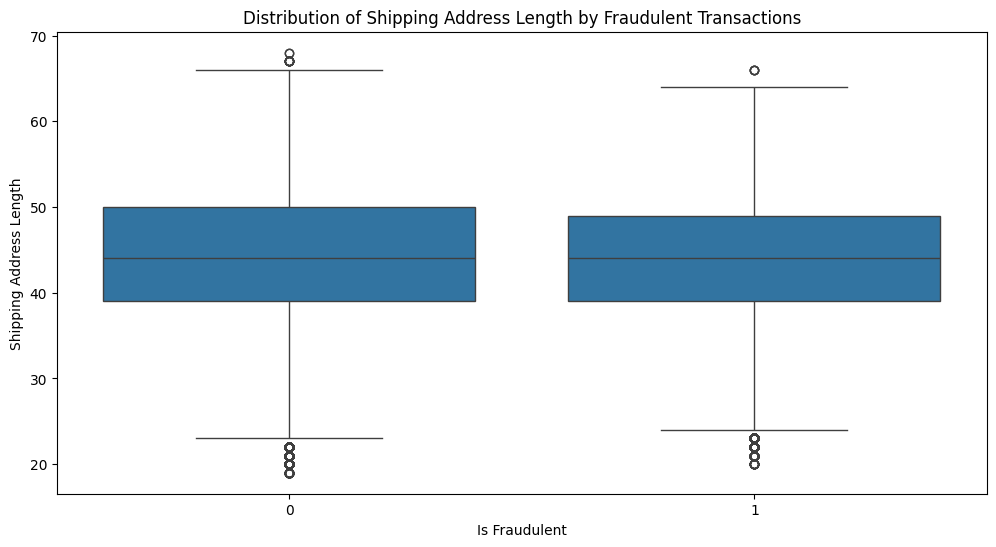

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is Fraudulent', y='Shipping Address Length', data=df)
plt.title('Distribution of Shipping Address Length by Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Shipping Address Length')
plt.show()

In [117]:
df = df.drop(['Shipping Address Length','Billing Address Length'], axis=1)

In [118]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Shipping State
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,NaN
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,NV
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,IL
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,UT
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,OH


In [119]:
df = df.drop(['Shipping Address','Billing Address'], axis=1)

In [120]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Is Fraudulent,Account Age Days,Transaction Hour,Shipping State
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,0,30,5,NaN
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,0,72,8,NV
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,0,63,3,IL
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,0,124,20,UT
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,0,158,5,OH


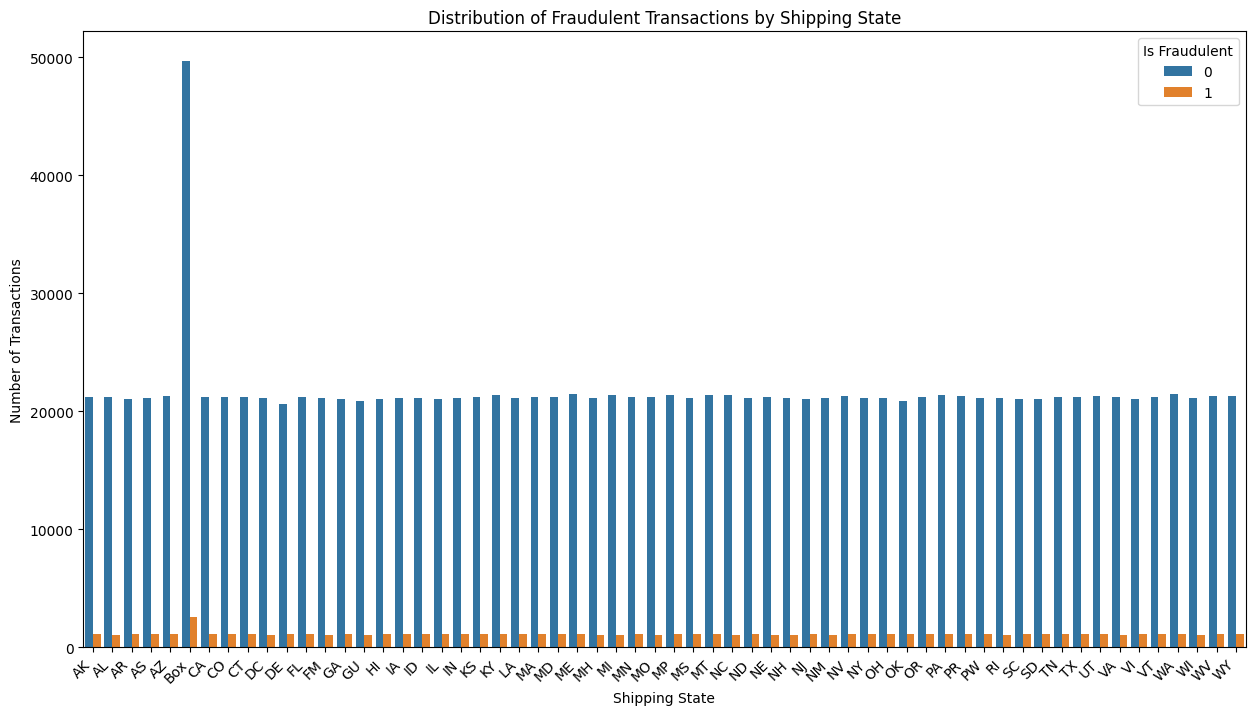

In [121]:
grouped_df = df.groupby(['Shipping State', 'Is Fraudulent']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='Shipping State', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Shipping State')
plt.xlabel('Shipping State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraudulent')
plt.show()

In [122]:
# no value

In [123]:
df = df.drop(['Shipping State'], axis=1)

In [124]:
import ipaddress

In [125]:
def classify_ip_basic(ip_address):
    try:
        ip = ipaddress.ip_address(ip_address)

        # Example basic heuristic classification
        if ip.is_private:
            return 'Residential'  # Most private IPs are used in residential networks
        elif ip.is_global:
            # Classify based on common ranges
            if ip in ipaddress.ip_network('172.16.0.0/12') or ip in ipaddress.ip_network('192.168.0.0/16'):
                return 'Commercial'  # Often seen in commercial settings
            elif ip in ipaddress.ip_network('10.0.0.0/8'):
                return 'Data Center'  # Used internally in larger organizations
            elif ip in ipaddress.ip_network('8.8.8.0/24'):
                return 'Mobile'  # Example of a mobile IP block
            else:
                return 'Unknown'
        else:
            return 'Unknown'
    except ValueError:
        return 'Invalid IP'

# Apply the heuristic classification to the DataFrame
df['IP Category'] = df['IP Address'].apply(classify_ip_basic)

In [126]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Is Fraudulent,Account Age Days,Transaction Hour,IP Category
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,0,30,5,Unknown
1,389.96,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,0,72,8,Unknown
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,0,63,3,Unknown
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,0,124,20,Unknown
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,0,158,5,Unknown


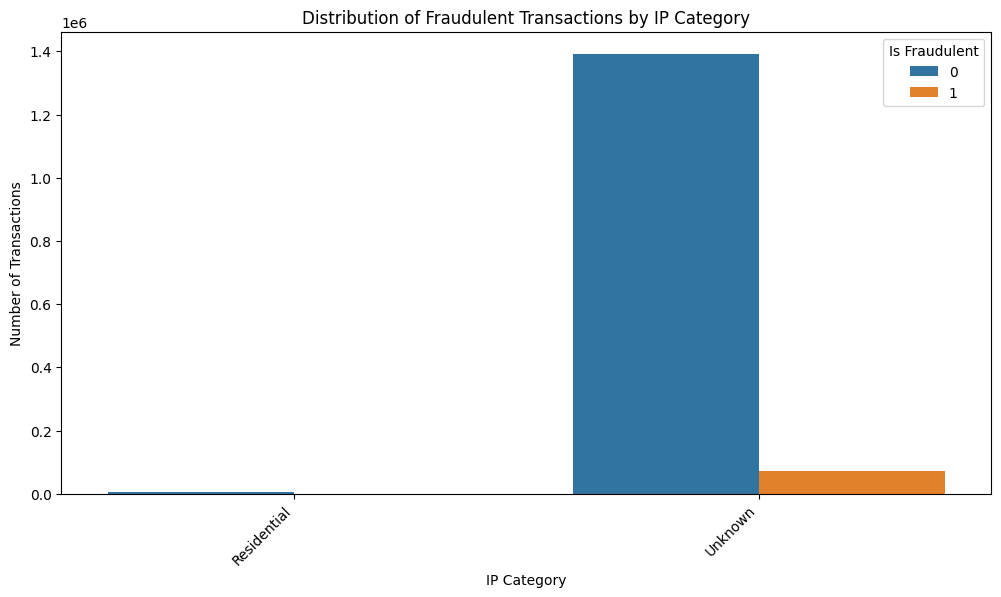

In [127]:
# Create a grouped DataFrame for plotting
grouped_df = df.groupby(['IP Category', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='IP Category', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by IP Category')
plt.xlabel('IP Category')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraudulent')
plt.xticks(rotation=45, ha='right')
plt.show()

In [128]:
# no effect of IP adress

In [129]:
df = df.drop(['IP Address','IP Category'], axis=1)

In [130]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,0,30,5
1,389.96,debit card,electronics,2,40,East Timothy,desktop,0,72,8
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,0,63,3
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,0,124,20
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,0,158,5


In [131]:
df['Payment Method'].nunique()

4

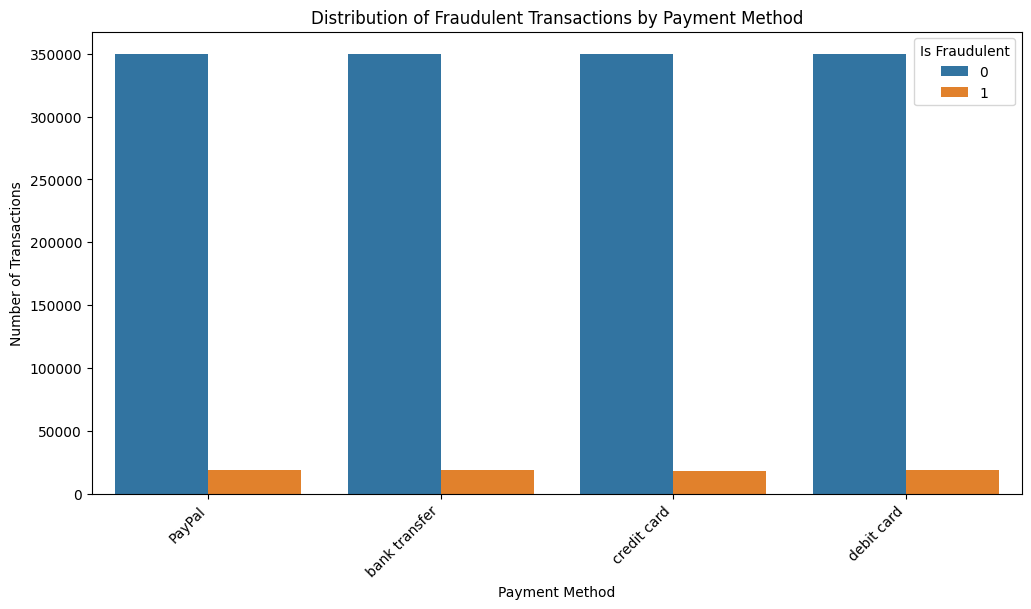

In [132]:
grouped_df = df.groupby(['Payment Method', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraudulent')
plt.show()

In [133]:
df['Product Category'].nunique()

5

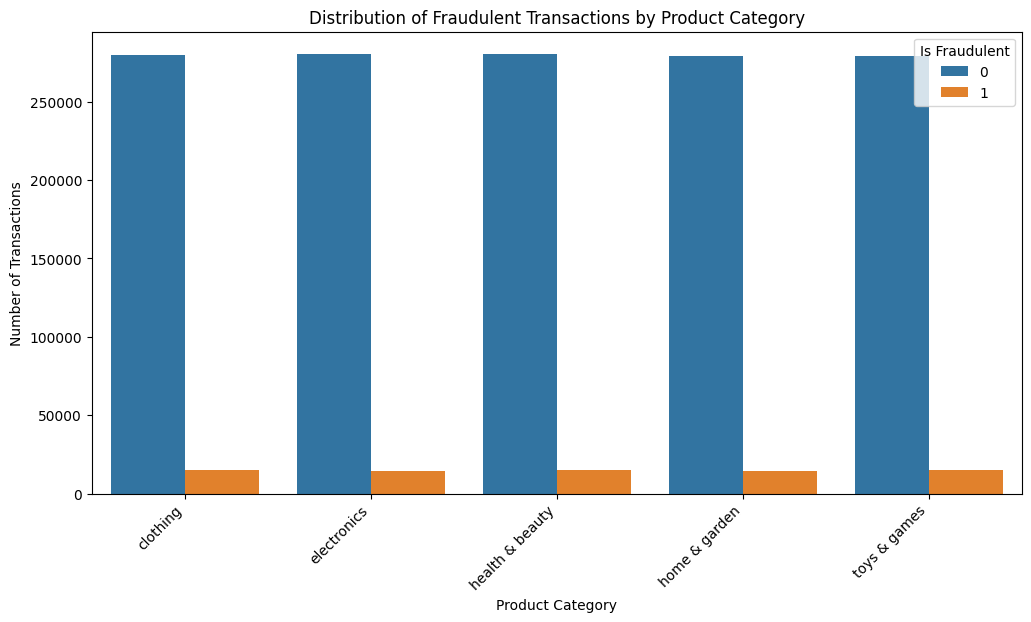

In [134]:
grouped_df = df.groupby(['Product Category', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraudulent')
plt.show()

In [135]:
df['Device Used'].nunique()

3

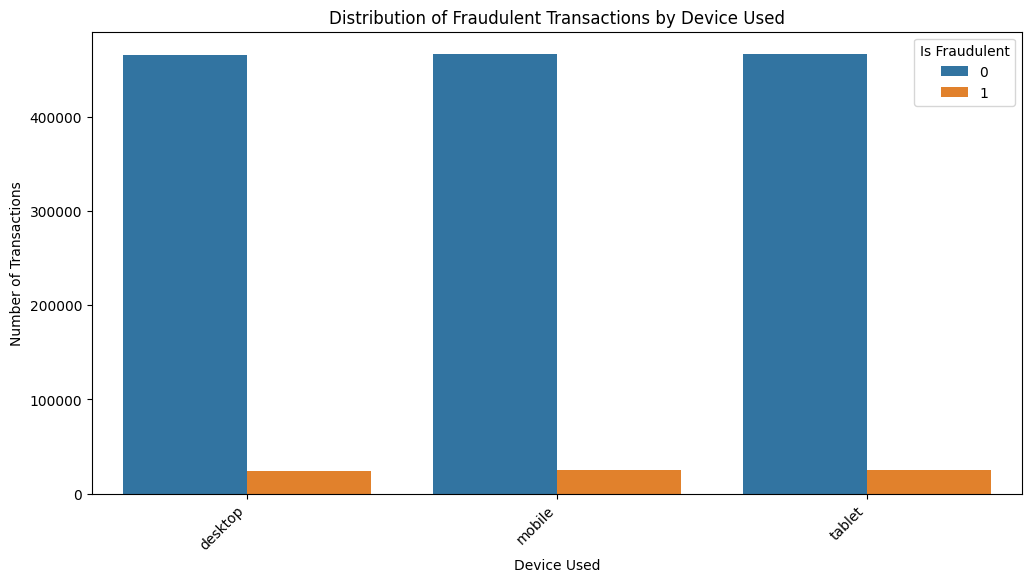

In [136]:
grouped_df = df.groupby(['Device Used', 'Is Fraudulent']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Device Used', y='Count', hue='Is Fraudulent', data=grouped_df)
plt.title('Distribution of Fraudulent Transactions by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraudulent')
plt.show()

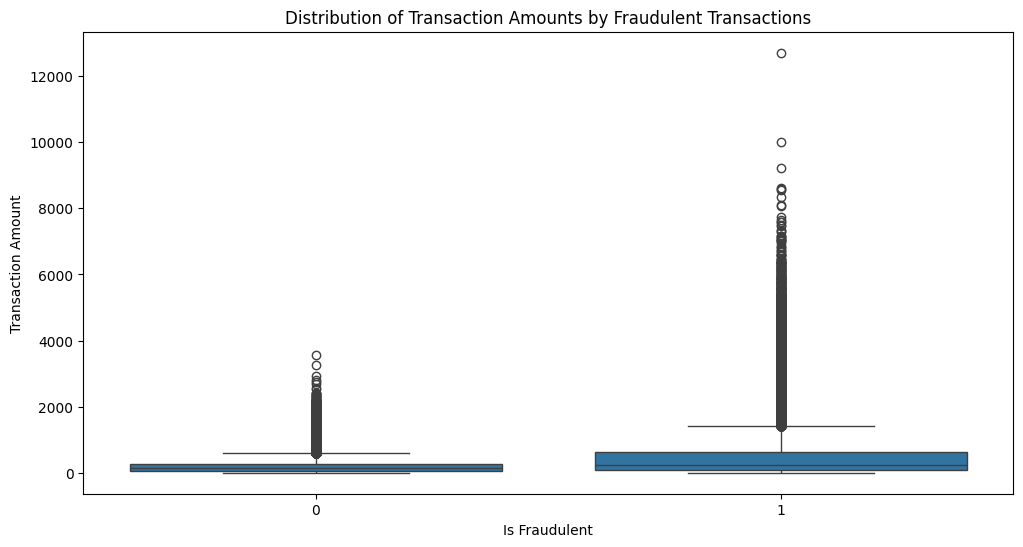

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=df)
plt.title('Distribution of Transaction Amounts by Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()

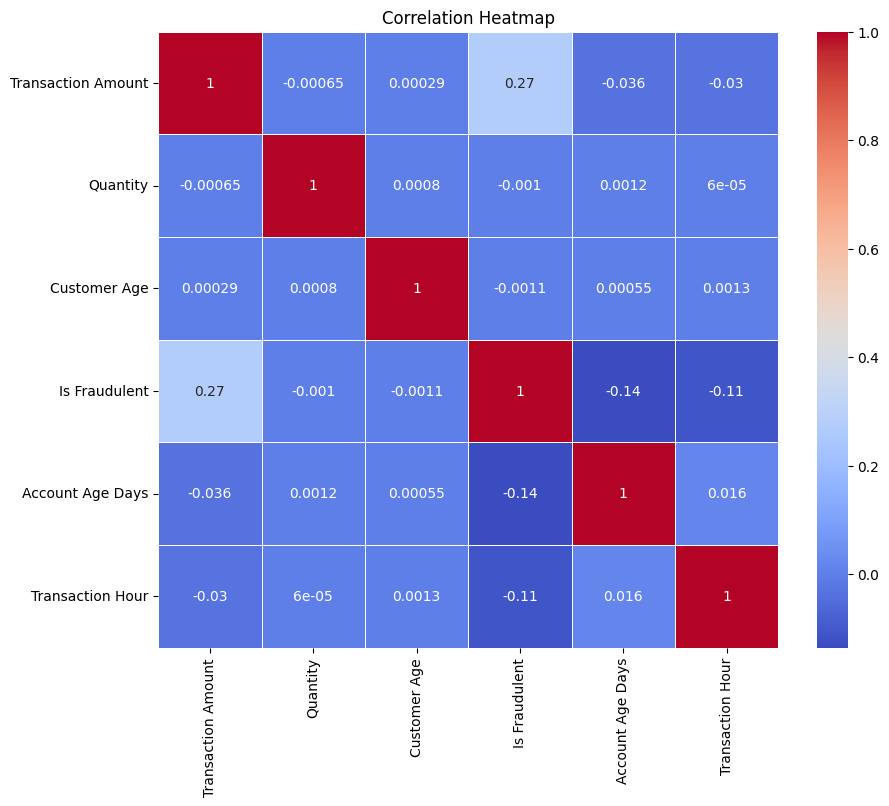

In [138]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [139]:
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Transaction Hour'].apply(categorize_hour)

In [140]:
df = df.drop(['Transaction Hour'], axis=1)

In [141]:
# Mapping the 'Time of Day' column to integers
time_of_day_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

df['Time of Day'] = df['Time of Day'].map(time_of_day_mapping)

In [142]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Time of Day
0,58.09,bank transfer,electronics,1,17,Amandaborough,tablet,0,30,3
1,389.96,debit card,electronics,2,40,East Timothy,desktop,0,72,0
2,134.19,PayPal,home & garden,2,22,Davismouth,tablet,0,63,3
3,226.17,bank transfer,clothing,5,31,Lynnberg,desktop,0,124,2
4,121.53,bank transfer,clothing,2,51,South Nicole,tablet,0,158,3


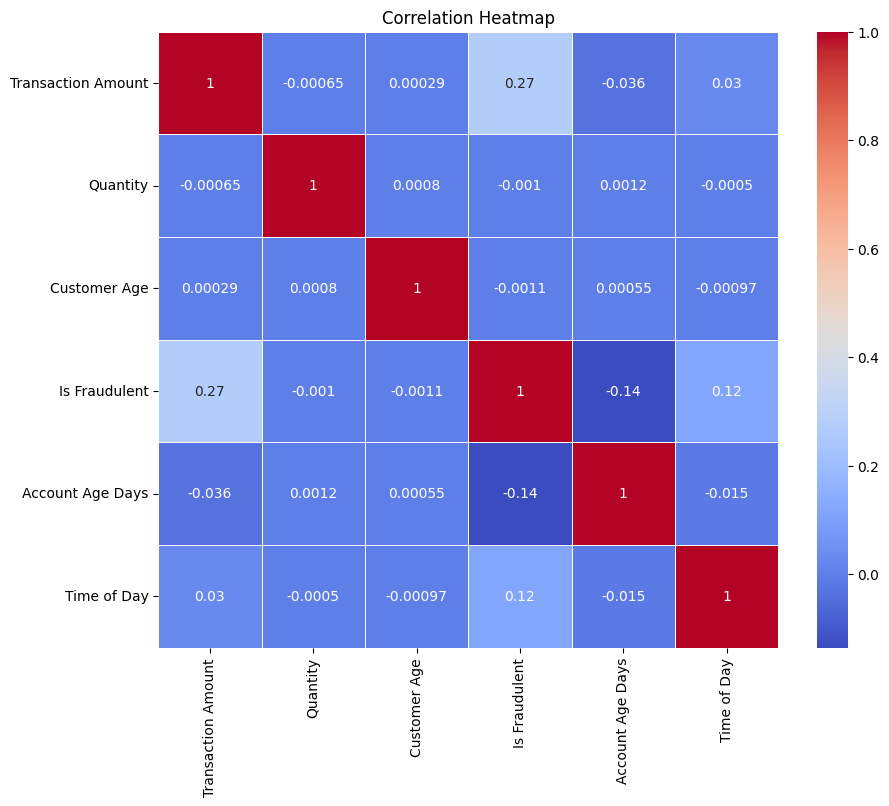

In [143]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [144]:
df['Device Used'].unique()

array(['tablet', 'desktop', 'mobile'], dtype=object)

In [145]:
# Mapping the 'Time of Day' column to integers
device_mapping = {
    'tablet': 0,
    'desktop': 1,
    'mobile': 2
}

df['Device Used'] = df['Device Used'].map(device_mapping)
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Time of Day
0,58.09,bank transfer,electronics,1,17,Amandaborough,0,0,30,3
1,389.96,debit card,electronics,2,40,East Timothy,1,0,72,0
2,134.19,PayPal,home & garden,2,22,Davismouth,0,0,63,3
3,226.17,bank transfer,clothing,5,31,Lynnberg,1,0,124,2
4,121.53,bank transfer,clothing,2,51,South Nicole,0,0,158,3


In [146]:
df['Payment Method'].unique()

array(['bank transfer', 'debit card', 'PayPal', 'credit card'],
      dtype=object)

In [147]:
payment_mapping = {
    'bank transfer': 0,
    'debit card': 1,
    'PayPal': 2,
    'credit card' : 3
}

df['Payment Method'] = df['Payment Method'].map(payment_mapping)
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Time of Day
0,58.09,0,electronics,1,17,Amandaborough,0,0,30,3
1,389.96,1,electronics,2,40,East Timothy,1,0,72,0
2,134.19,2,home & garden,2,22,Davismouth,0,0,63,3
3,226.17,0,clothing,5,31,Lynnberg,1,0,124,2
4,121.53,0,clothing,2,51,South Nicole,0,0,158,3


In [148]:
df['Product Category'].unique()

array(['electronics', 'home & garden', 'clothing', 'toys & games',
       'health & beauty'], dtype=object)

In [150]:
payment_mapping = {
    'electronics': 0,
    'home & garden': 1,
    'clothing': 2,
    'toys & games' : 3,
    'health & beauty' : 4
}

df['Product Category'] = df['Product Category'].map(payment_mapping)
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Time of Day
0,58.09,0,0,1,17,Amandaborough,0,0,30,3
1,389.96,1,0,2,40,East Timothy,1,0,72,0
2,134.19,2,1,2,22,Davismouth,0,0,63,3
3,226.17,0,2,5,31,Lynnberg,1,0,124,2
4,121.53,0,2,2,51,South Nicole,0,0,158,3


In [151]:
df['Customer Location'].unique()

array(['Amandaborough', 'East Timothy', 'Davismouth', ...,
       'West Peggyshire', 'New Maxfort', 'South Melvinburgh'],
      dtype=object)

In [152]:
df = df.drop(['Customer Location'], axis=1)

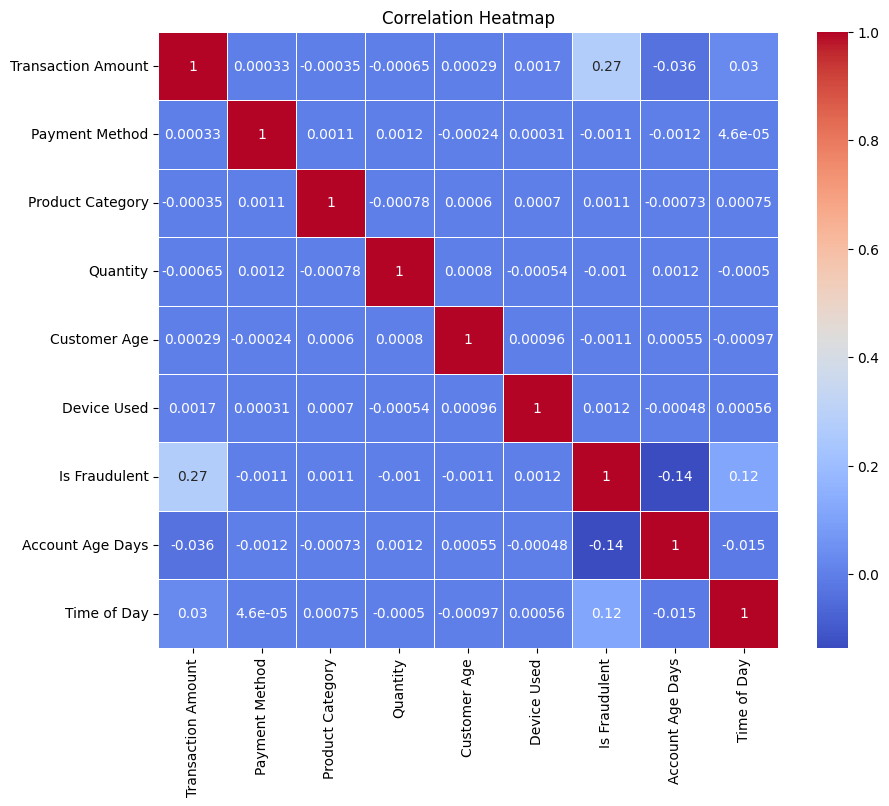

In [153]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [154]:
# Interaction among 'Transaction Amount', 'Time of Day', and 'Account Age Days'
df['Amount_TimeOfDay_AccountAge'] = df['Transaction Amount'] * df['Time of Day'] * df['Account Age Days']


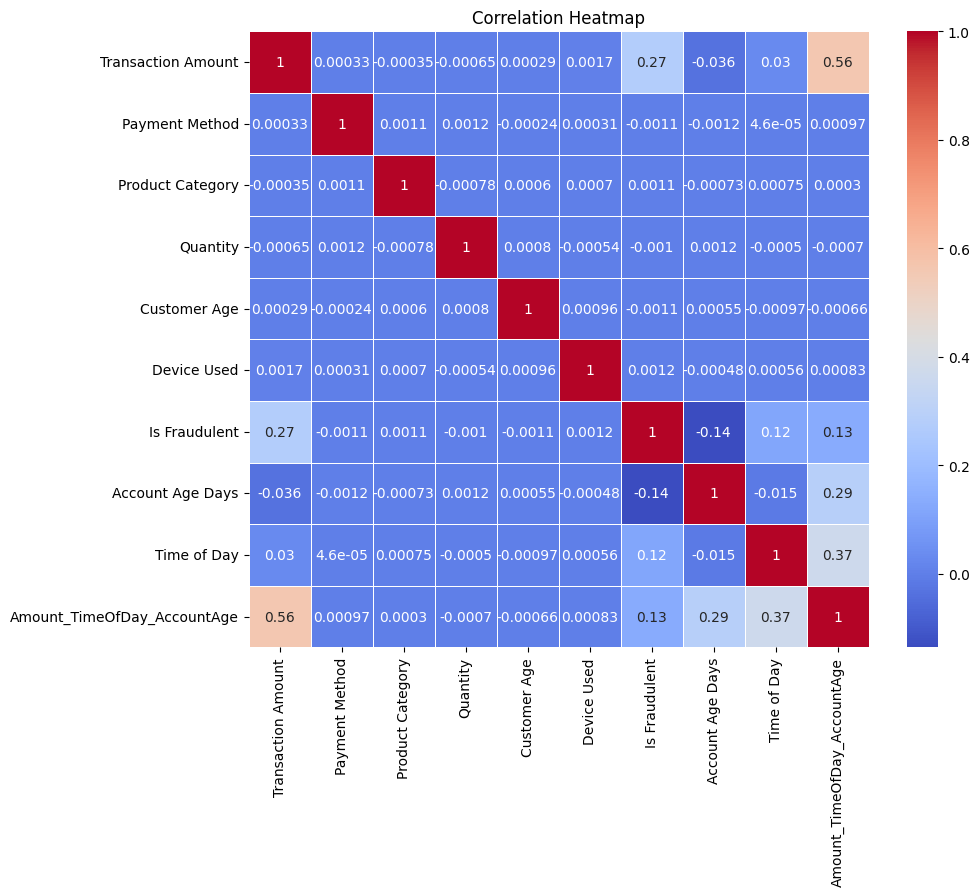

In [155]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [156]:
# Interaction between 'Transaction Amount' and 'Time of Day'
df['Amount_TimeOfDay'] = df['Transaction Amount'] * df['Time of Day']

# Interaction between 'Transaction Amount' and 'Account Age Days'
df['Amount_AccountAge'] = df['Transaction Amount'] * df['Account Age Days']

# Interaction between 'Time of Day' and 'Account Age Days'
df['TimeOfDay_AccountAge'] = df['Time of Day'] * df['Account Age Days']


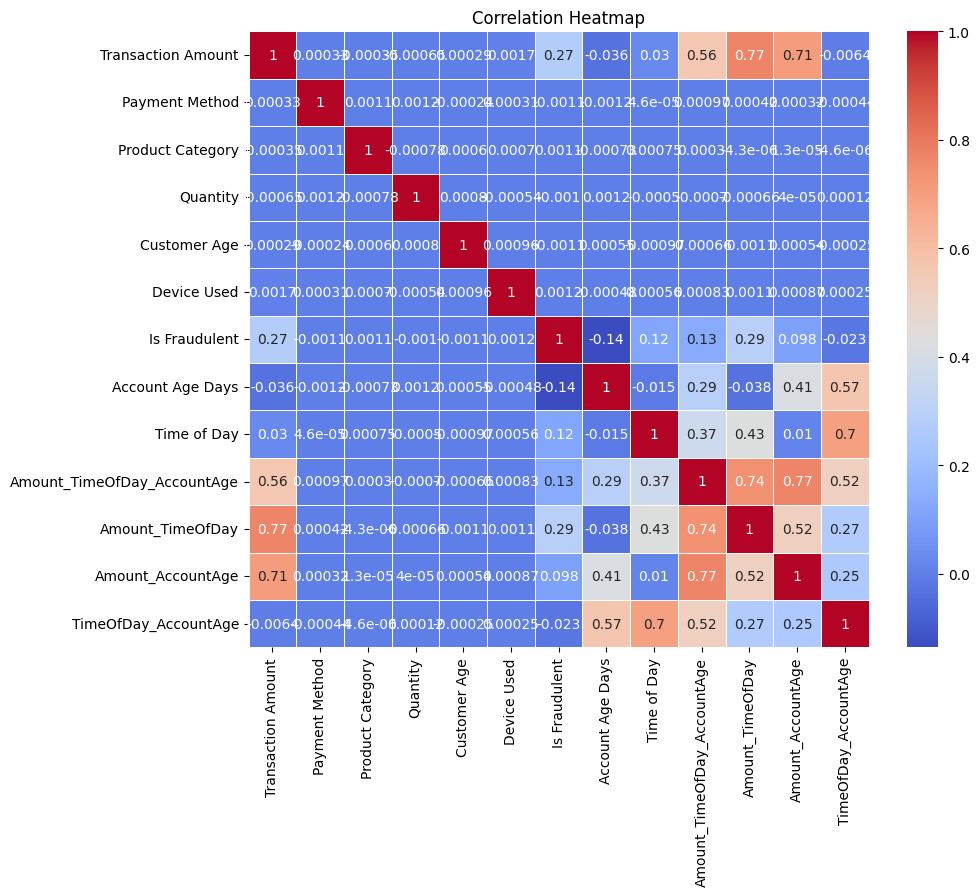

In [157]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [158]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Time of Day,Amount_TimeOfDay_AccountAge,Amount_TimeOfDay,Amount_AccountAge,TimeOfDay_AccountAge
0,58.09,0,0,1,17,0,0,30,3,5228.10,174.27,1742.70,90
1,389.96,1,0,2,40,1,0,72,0,0.00,0.00,28077.12,0
2,134.19,2,1,2,22,0,0,63,3,25361.91,402.57,8453.97,189
3,226.17,0,2,5,31,1,0,124,2,56090.16,452.34,28045.08,248
4,121.53,0,2,2,51,0,0,158,3,57605.22,364.59,19201.74,474


In [159]:
df = df.drop(['Payment Method','Product Category','Customer Age','Device Used'], axis = 1)

In [160]:
df.head()

,Transaction Amount,Quantity,Is Fraudulent,Account Age Days,Time of Day,Amount_TimeOfDay_AccountAge,Amount_TimeOfDay,Amount_AccountAge,TimeOfDay_AccountAge
0,58.09,1,0,30,3,5228.10,174.27,1742.70,90
1,389.96,2,0,72,0,0.00,0.00,28077.12,0
2,134.19,2,0,63,3,25361.91,402.57,8453.97,189
3,226.17,5,0,124,2,56090.16,452.34,28045.08,248
4,121.53,2,0,158,3,57605.22,364.59,19201.74,474
